In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

# 데이터 시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

# 정규화
from sklearn.preprocessing import MinMaxScaler

#표준화
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# 데이터 정보 확인

In [2]:
df=pd.read_csv('3.1_original_useDf_0714.csv')
df.head(1)

In [4]:
# null값 확인
df.isnull().sum()

Num                  0
Title                0
Value                0
Series or Movie      0
originCountry      206
Genre              370
country_all          0
countryCount         0
dtype: int64

In [5]:
df.describe().round()

,Num,Value,countryCount
count,2960.0,2960.0,2960.0
mean,1480.0,634.0,16.0
std,855.0,2202.0,14.0
min,0.0,1.0,1.0
25%,740.0,22.0,3.0
50%,1480.0,80.0,10.0
75%,2219.0,321.0,35.0
max,2959.0,44867.0,37.0


# viewpoint 정규화

### min-max 정규화

In [6]:
min_max_scaler = MinMaxScaler()
value=df[['Value','countryCount']].values

In [8]:
#df['Value_std'] = min_max_scaler.fit_transform(value.reshape(-1,1))
df[['Value_std','countryCount_std']] = min_max_scaler.fit_transform(value)

In [9]:
df.head(10)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount,Value_std,countryCount_std
0,0,thequeensgambit,44867,TV,United States,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,1.000000,0.972222
1,1,365days,42149,Movie,Poland,Romance,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.939420,0.972222
2,2,emilyinparis,27138,TV,United States,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.604846,0.972222
3,3,lucifer,25729,TV,United States,Superhero,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",35,0.573441,0.944444
4,4,theumbrellaacademy,23480,TV,United States,Superhero,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.523314,0.972222
...,...,...,...,...,...,...,...,...,...,...
95,95,lostbullet,4459,Movie,France,Crime,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.099363,0.972222
96,96,prisonbreak,4356,TV,United States,Action,"['Australia', 'Belgium', 'Canada', 'Czech Repu...",28,0.097067,0.750000
97,97,unorthodox,4285,TV,Germany,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.095484,0.972222
98,98,6underground,4267,Movie,United States,Action,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.095083,0.972222


In [10]:
df.describe()

,Num,Value,countryCount,Value_std,countryCount_std
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000
mean,1479.500000,633.733446,16.180405,0.014103,0.421678
std,854.622724,2202.145547,14.071531,0.049083,0.390876
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,739.750000,22.000000,3.000000,0.000468,0.055556
50%,1479.500000,80.000000,10.000000,0.001761,0.250000
75%,2219.250000,321.000000,35.000000,0.007132,0.944444
max,2959.000000,44867.000000,37.000000,1.000000,1.000000


### 표준화 실시

In [11]:
scaler = StandardScaler()
value2=df[['Value_std','countryCount_std']].values

In [12]:
df[['Value_norm','countryCount_norm']] = scaler.fit_transform(value2)

In [13]:
df.head(2)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount,Value_std,countryCount_std,Value_norm,countryCount_norm
0,0,thequeensgambit,44867,TV,United States,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,1.00000,0.972222,20.089835,1.408727
1,1,365days,42149,Movie,Poland,Romance,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,0.93942,0.972222,18.855375,1.408727


In [14]:
df.describe().round()

,Num,Value,countryCount,Value_std,countryCount_std,Value_norm,countryCount_norm
count,2960.0,2960.0,2960.0,2960.0,2960.0,2960.0,2960.0
mean,1480.0,634.0,16.0,0.0,0.0,0.0,0.0
std,855.0,2202.0,14.0,0.0,0.0,1.0,1.0
min,0.0,1.0,1.0,0.0,0.0,-0.0,-1.0
25%,740.0,22.0,3.0,0.0,0.0,-0.0,-1.0
50%,1480.0,80.0,10.0,0.0,0.0,-0.0,-0.0
75%,2219.0,321.0,35.0,0.0,1.0,-0.0,1.0
max,2959.0,44867.0,37.0,1.0,1.0,20.0,1.0


# 생산국가 종류와 viewpoint

In [15]:
from collections import Counter

In [16]:
df_country = df[['Num','Value','originCountry']]

In [17]:
df_country.head(1)

,Num,Value,originCountry
0,0,44867,United States


## null 값 확인 및 제거

In [18]:
df_country.isnull().sum()

Num                0
Value              0
originCountry    206
dtype: int64

In [19]:
df_country=df_country.dropna(subset=['originCountry'])
df_country=df_country.reset_index()

In [21]:
df_country

,index,Num,Value,originCountry
0,0,0,44867,United States
1,1,1,42149,Poland
2,2,2,27138,United States
3,3,3,25729,United States
4,4,4,23480,United States
...,...,...,...,...
2749,2955,2955,1,United States
2750,2956,2956,1,United States
2751,2957,2957,1,United States
2752,2958,2958,1,United States


In [22]:
# 컬럼값 변경
df_country=df_country[['Value','originCountry']]
df_country

In [24]:
# 결측치 확인
df_country.isnull().sum()

Value            0
originCountry    0
dtype: int64

In [25]:
# value 내림차순 기준 top 100 영화의 생산국가 추출
df_view_top100=df_country[:][:100]

In [26]:
value = list(df_country.Value)
country_count_list = list(df_country.originCountry.values)

# 상관성 확인 방법
어떤 방식으로 상관성을 표현해야하는지 고민중에 box plot으로 value-originCountry의 등분산성을 확인 후, 방법 선정

AttributeError: 'float' object has no attribute 'shape'

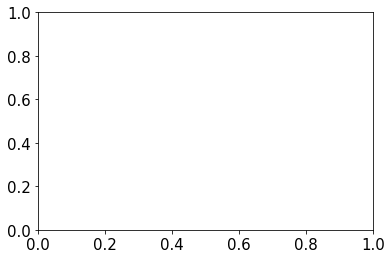

<Figure size 864x360 with 0 Axes>

In [74]:
# 시각화를 위한 등분산성 확인
import plotly.express as px
import matplotlib.pyplot as plt
colors = []
fig, ax = plt.subplots()
plt.figure(figsize=(12,5))

violin = ax.violinplot(df_country)


In [28]:
# view 기준 top100 생산국가 count

In [29]:
dfdf_top100=Counter(df_view_top100)

In [30]:
# 전체 데이터셋에서 생산국가별 영화 갯수
country_counter = Counter(df_country.originCountry)
country_counter

Counter({'United States': 1570,
         'Poland': 27,
         'Mexico': 21,
         'United Kingdom': 177,
         'Colombia': 16,
         'Canada': 52,
         'Germany': 31,
         'South Korea': 108,
         'Spain': 43,
         'China': 14,
         'France': 73,
         'Russia': 3,
         'Italy': 26,
         'Turkey': 39,
         'Japan': 126,
         'Angola': 1,
         'Denmark': 10,
         'Sweden': 3,
         'Austria': 4,
         'Belgium': 7,
         'Ireland': 6,
         'Brazil': 14,
         'South Africa': 16,
         'Norway': 6,
         'India': 82,
         'Egypt': 14,
         'Hong-Kong': 17,
         'Argentina': 10,
         'Philippines': 39,
         'Nigeria': 33,
         'Australia': 27,
         'Taiwan': 10,
         'Lebanon': 4,
         'Slovakia': 2,
         'Kuwait': 2,
         'Israel': 4,
         'Thailand': 26,
         'Romania': 5,
         'Netherlands': 6,
         'Iceland': 2,
         'Czech Republic': 20,
    

In [31]:
df_view_country=pd.DataFrame.from_dict(country_counter, orient='index', columns=['counts'])
df_view_country=df_view_country.reset_index()
df_view_country

In [34]:
df_view_country=df_view_country.rename(columns={'index':'Country'})
df_view_country.head(1)

In [36]:
df_view_top20 = df_view_country[:][:20]
df_view_top20

## Which country produces the most Contents?

In [39]:
# 전체 데이터셋 count를 내림 차순 정렬 
df_count_country=pd.DataFrame.from_dict(country_counter, orient='index', columns=['counts'])
df_count_country.sort_values('counts', ascending=False, inplace=True)
df_count_country=df_count_country.reset_index()
df_count_country['Country']=df_count_country['index']
df_count_country=df_count_country[['Country','counts']]

,counts
United States,1570
United Kingdom,177
Japan,126
South Korea,108
India,82
...,...
Angola,1
Peru,1
Dominican Republic,1
Bulgaria,1


In [81]:
tot = sum(df_count_country.counts)
top20 = sum(df_count_country.counts[:10])

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 2754
top 20 countries : 2309
percentage : 2309/2754 = 83.84168482207699


In [40]:
df_count_country

,Country,counts
0,United States,1570
1,United Kingdom,177
2,Japan,126
3,South Korea,108
4,India,82
...,...,...
60,Angola,1
61,Peru,1
62,Dominican Republic,1
63,Bulgaria,1


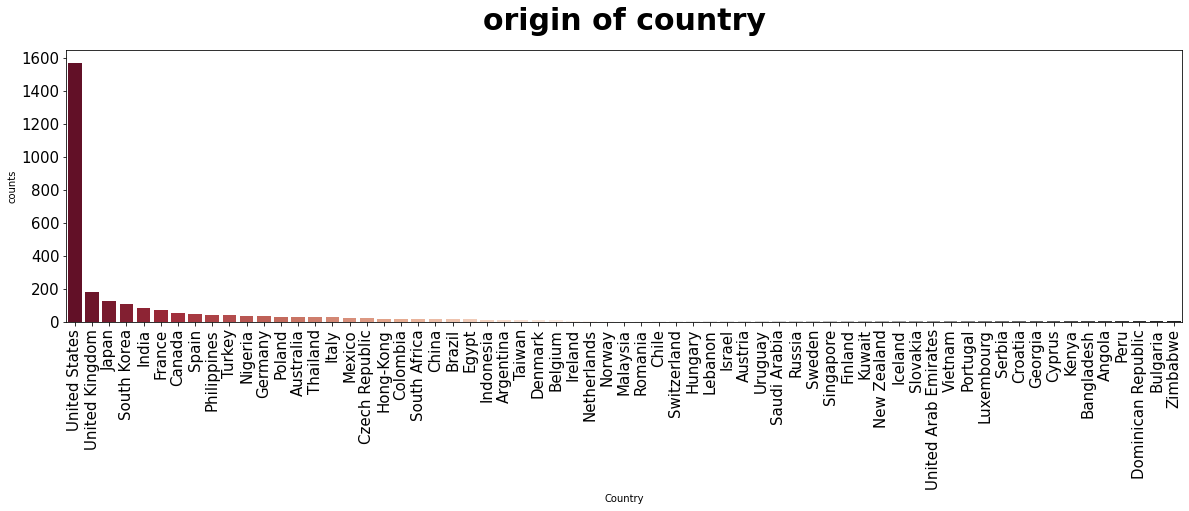

In [54]:
from matplotlib import gridspec
import matplotlib
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)
                       #height_ratios=[1, 0.7]) 
                       #width_ratios=[17, 17])

ax = plt.subplot(gs[0])
sns.barplot(df_count_country['Country'], df_count_country['counts'], ax=ax, palette="RdGy")
ax.set_xticklabels(df_count_country['Country'], rotation='90')
ax.set_title('origin of country',fontsize=30, fontweight='bold', pad=20)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.show()

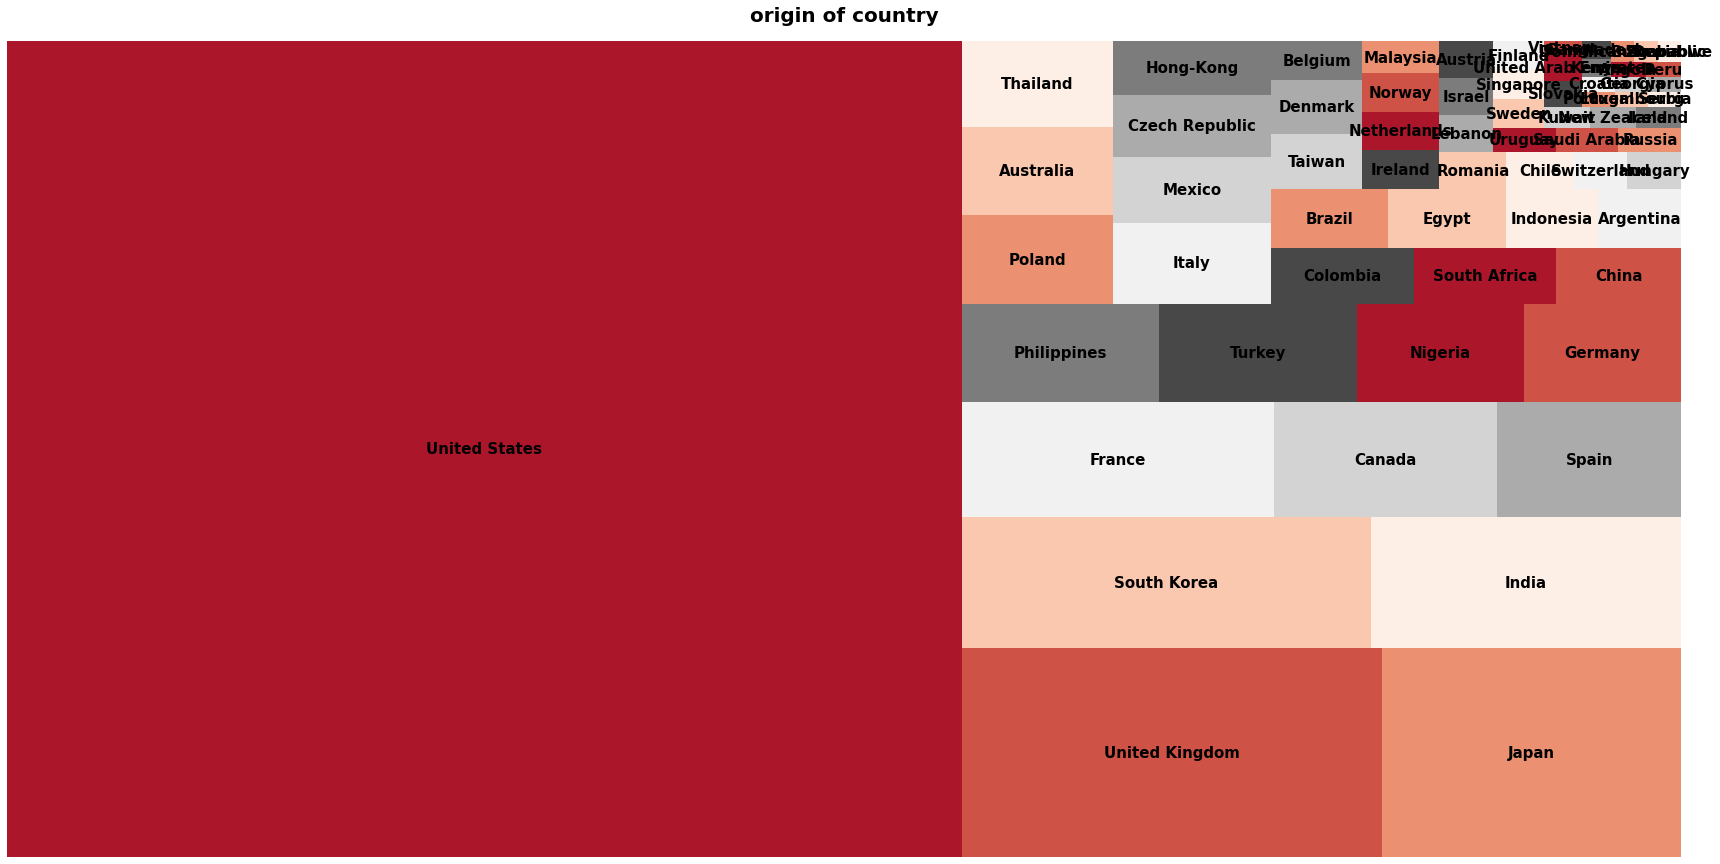

In [44]:
import squarify

fig = plt.figure(figsize=(30,15))
squarify.plot(sizes = df_count_country['counts'], label = df_count_country['Country'], color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':15, 'fontweight' : 'bold'})
plt.title('origin of country', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

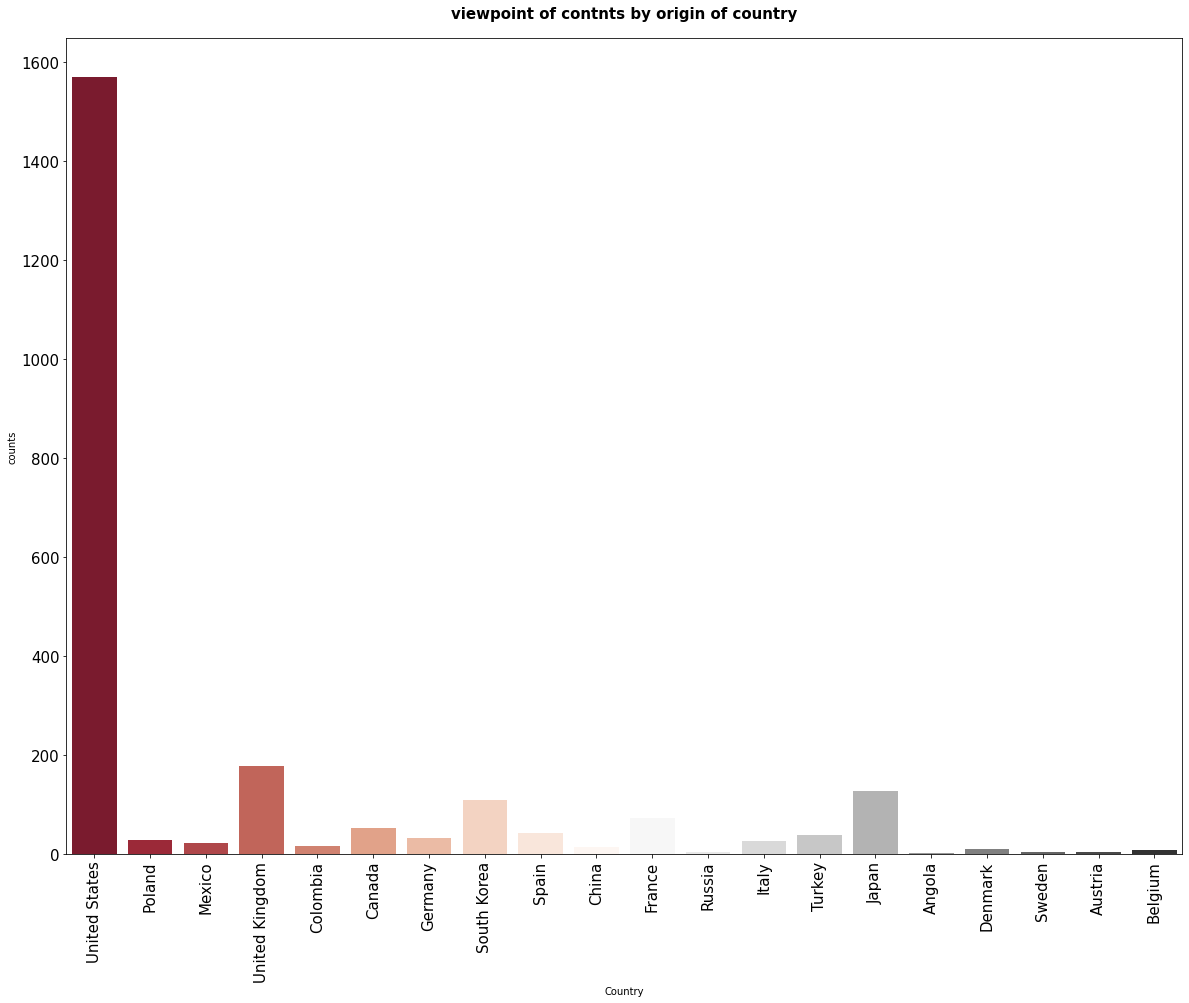

In [57]:
from matplotlib import gridspec
import matplotlib
import matplotlib.pyplot as plt



# 전체 데이터 셋에서 viewpoint 기준 originCountry top100 태그들의 분포

fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(nrows=1, ncols=1)
                       #height_ratios=[1, 0.7]) 
                       #width_ratios=[17, 17])

ax = plt.subplot(gs[0])
sns.barplot(df_view_top20['Country'], df_view_top20['counts'], ax=ax, palette="RdGy")
ax.set_xticklabels(df_view_top20['Country'], rotation='90')
ax.set_title('viewpoint of contents by origin of country',fontsize=15, fontweight='bold', pad=20)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
plt.show()

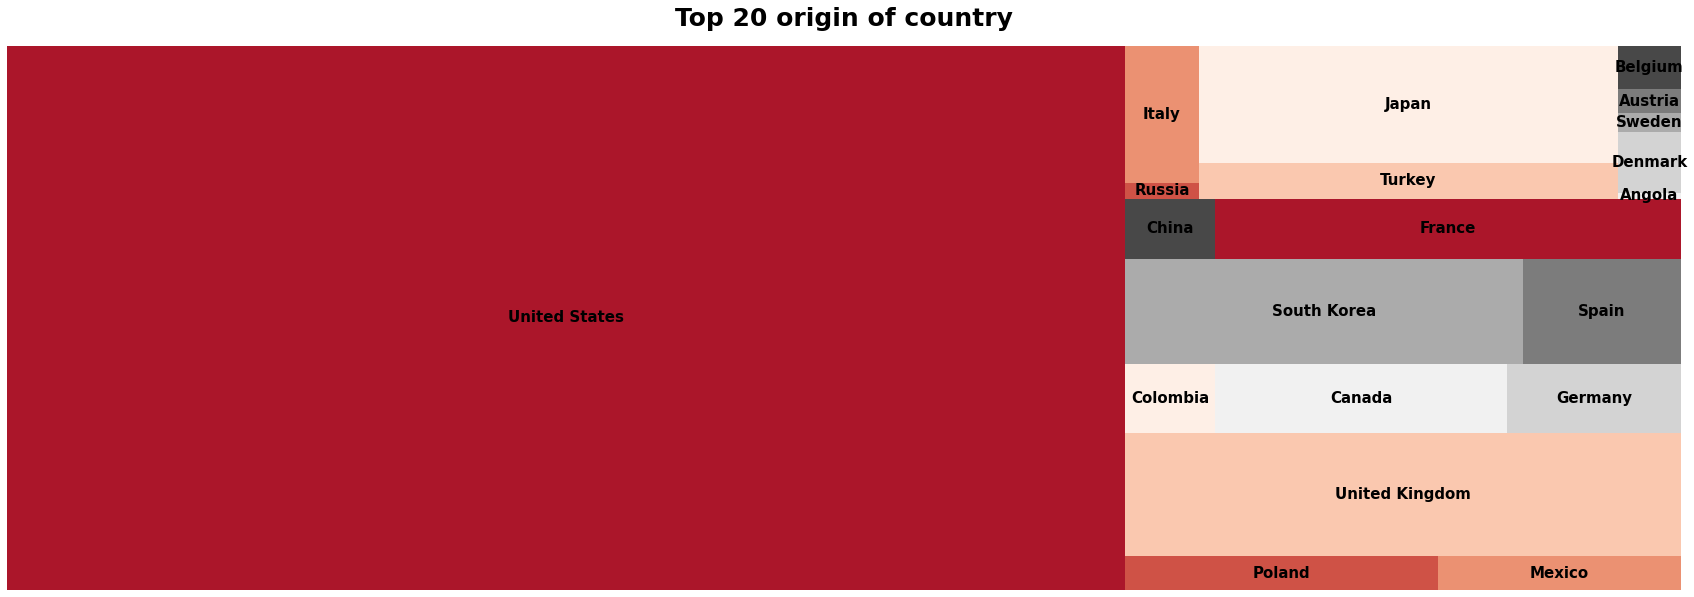

In [47]:
import squarify

fig = plt.figure(figsize=(30,10))
squarify.plot(sizes = df_view_top20['counts'], label = df_view_top20['Country'], color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':15, 'fontweight' : 'bold'})
plt.title('Top 20 origin of country', position=(0.5, 1.0+0.03), fontsize = 25, fontweight='bold', pad=20)
plt.axis('off')
plt.show()